In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

100% 211k/211k [00:00<00:00, 748kB/s]
100% 211k/211k [00:00<00:00, 748kB/s]


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir


--2023-12-08 05:07:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-08 05:07:32 (97.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
unzip_data('/content/sms-spam-collection-dataset.zip')

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1', usecols=['v1','v2'])
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
len(df)

5572

In [ ]:
df['label_enc'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<Axes: xlabel='label', ylabel='count'>

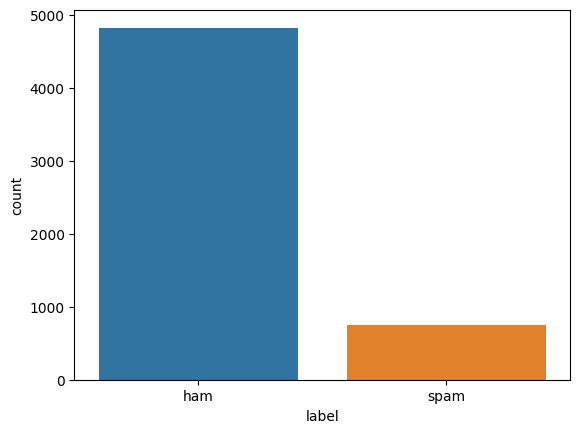

In [ ]:
sns.countplot(x = df.label)

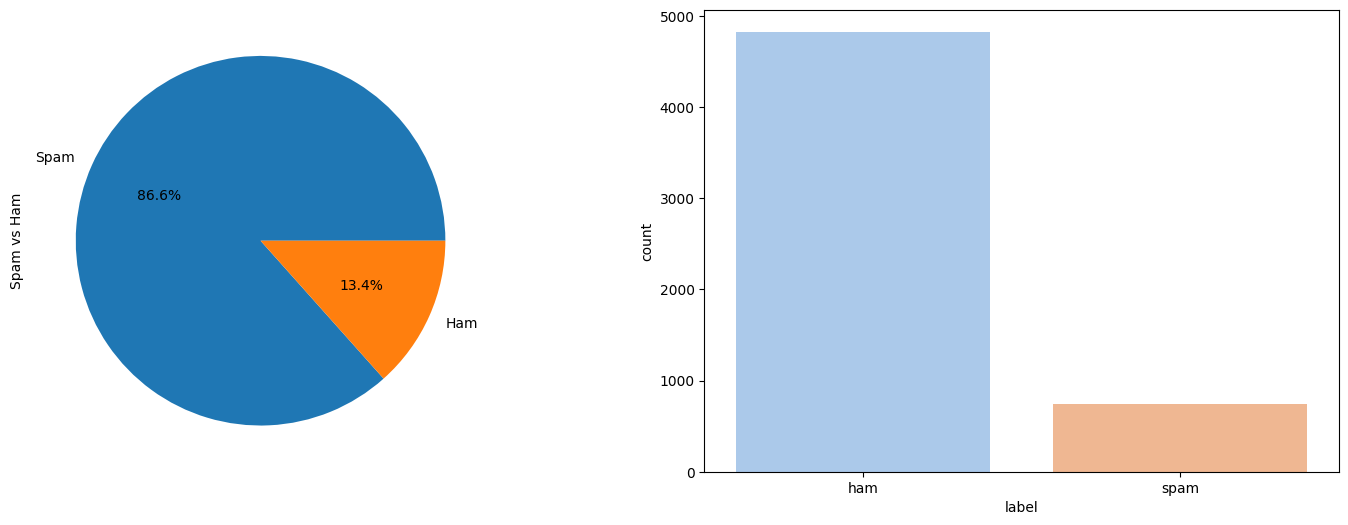

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
df.label.value_counts().plot(
    kind='pie',
    labels=['Spam', 'Ham'],
    ylabel='Spam vs Ham',
    autopct='%1.1f%%'
)
plt.subplot(1,2,2)
sns.countplot(x='label', data=df, palette='pastel')
plt.show()


In [ ]:
import re
def text_preprocessing(text):
    text = re.sub(r'[^a-zA-Z\s]', "", str(text))
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = re.sub(r'[^\w\s]', '', str(text))
    text = re.sub(r'http\S+', '', str(text))
    text = whitespace.sub(' ', text)
    text = web_address.sub('', text)
    text = user.sub('', text)
    text = re.sub(r"\[[^()]*\]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    return text

df["text"] = df['text'].apply(text_preprocessing)
df["text"]

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in a wkly comp to win fa cup final ...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the nd time we have tried contact u u ...
5568                    will b going to esplanade fr home
5569    pity was in mood for that soany other suggestions
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: text, Length: 5572, dtype: object

In [ ]:
# Remove stopwords

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  filtered_text = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_text)

df["text"] = df["text"].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["text"]

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Function to lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df["text"] = df["text"].apply(lemmatize_text)
df["text"]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

In [ ]:
df.text.isnull().value_counts()

False    5572
Name: text, dtype: int64

## Split data

In [ ]:
import random
random_index = random.randint(0, len(df)-5)

for row in df[['label', 'text']][random_index:random_index+10].itertuples():
    _, text, target = row
    print(f"Target: {target}")
    print(f"Text:\n{text}\n")
    print("---\n")

Target: honeybee said im sweetest world god laughed amp said waitu havnt met person reading msg moral even god crack joke gmgngegn
Text:
ham

---

Target: thanks tescos quite nice gone speak soon
Text:
ham

---

Target: whats feathery bowa something guy dont know
Text:
ham

---

Target: even cant close eye vava playing umma
Text:
ham

---

Target: laptop noe infra slow lar wan fast one
Text:
ham

---

Target: guaranteed award even cashto claim ur award call free stop getstop php
Text:
spam

---

Target: nvm ok
Text:
ham

---

Target: enjoy ur life good night
Text:
ham

---

Target: yes meet town co go gep home could text bus stop dont worry well finished march ish
Text:
ham

---

Target: askd u question hour answer
Text:
ham

---



In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df["text"].to_numpy(),
                                                                            df["label_enc"].to_numpy(),
                                                                            test_size=0.2, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)


(4457, 4457, 1115, 1115)

In [ ]:
val_labels

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
average_of_tokens = round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
average_of_tokens

9

In [ ]:
s = set()
for sent in df['text']:
  for word in sent.split():
   s.add(word)
total_words_len = len(s)
print(total_words_len)

7862


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Setup text vectorization variables
max_vocab_length = total_words_len # max number of words to have in our vocabulary
max_length = average_of_tokens # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentences = 'This app sucks asd a ww as asd'
text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 9), dtype=int64, numpy=array([[   1, 1356,    1,    1,    1,    1,  576,    1,    0]])>

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length) # how long is each input

embedding


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")


Our baseline model achieves an accuracy of: 96.68%


In [ ]:
baseline_preds = model_0.predict(val_sentences)

In [ ]:
from helper_functions import calculate_results

# Get baseline results

baseline_results = calculate_results(
    y_true=val_labels,
    y_pred=baseline_preds
)

baseline_results

{'accuracy': 96.68161434977578,
 'precision': 0.9680414954843677,
 'recall': 0.9668161434977578,
 'f1': 0.9647940181783204}

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [ ]:
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjust the learning rate as needed
    metrics=["accuracy"]
)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 9)                 0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 9, 128)            1006336   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1006465 (3.84 MB)
Trainable params: 100

In [ ]:

# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
)


Epoch 1/5
140/140 [==============================] - 14s 57ms/step - loss: 0.4414 - accuracy: 0.9208 - val_loss: 0.2339 - val_accuracy: 0.9480
Epoch 2/5
140/140 [==============================] - 2s 14ms/step - loss: 0.1553 - accuracy: 0.9630 - val_loss: 0.1355 - val_accuracy: 0.9668
Epoch 3/5
140/140 [==============================] - 1s 9ms/step - loss: 0.0913 - accuracy: 0.9767 - val_loss: 0.1065 - val_accuracy: 0.9722
Epoch 4/5
140/140 [==============================] - 2s 11ms/step - loss: 0.0642 - accuracy: 0.9841 - val_loss: 0.0913 - val_accuracy: 0.9740
Epoch 5/5
140/140 [==============================] - 1s 7ms/step - loss: 0.0474 - accuracy: 0.9872 - val_loss: 0.0822 - val_accuracy: 0.9758


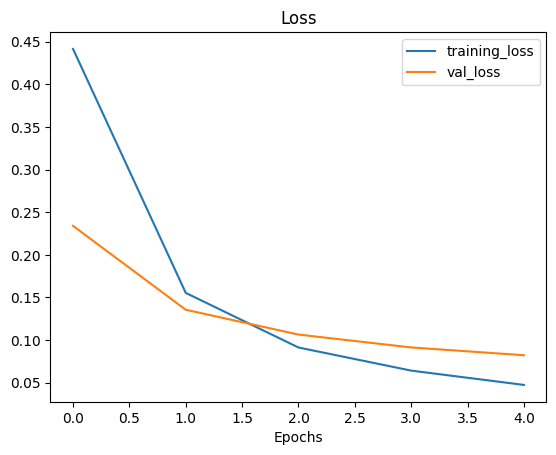

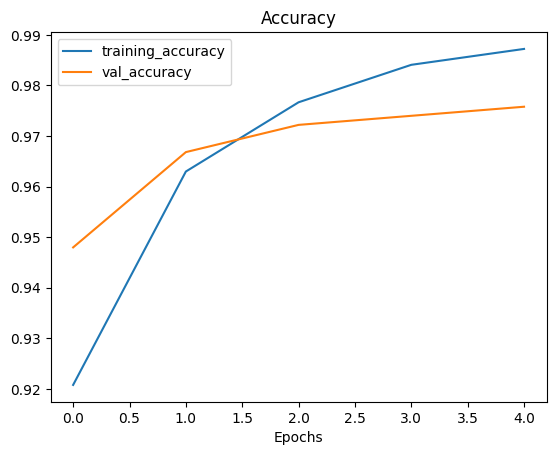

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}" f" Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [ ]:
sample_sms = '2 entri to get 101 mill1ions'
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_1, # use the USE model
                    sentence=sample_sms)

1/1 [==============================] - 0s 34ms/step
Pred: 0.0 Prob: 0.060566991567611694
Text:
2 entri to get 101 mill1ions
